In [1]:

import requests
from PIL import Image
from io import BytesIO
import pandas as pd
from transformers import CLIPProcessor, CLIPModel
import torch
from matplotlib.pyplot import imshow
import numpy as np
from IPython.display import display

import glob
import shutil

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
train_p=glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/train/*/*.jpg")
train_p[0].split("/")[6]

'0'

In [13]:
train_p=glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/train_/*/*.jpg")
train_c=[i.split("/")[6] for i in train_p]
df=pd.DataFrame({"path":train_p,"class":train_c})
df.to_csv("/Users/kunkerdthaisong/cils/train_wet_dry.csv",index=False)

In [36]:
test_p=glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/test/*")#/Users/kunkerdthaisong/cils/train_test_flood_img/test/2022-3ZMKY6_c2.jpg
test_c=[i.split("_c")[1].split(".jpg")[0] for i in test_p]
df=pd.DataFrame({"path":test_p,"class":test_c})
df.to_csv("/Users/kunkerdthaisong/cils/test.csv",index=False)

In [ ]:
test_p=glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/test/*.jpg") 
test_c=[i.split("/")[6] for i in train_p]
df=pd.DataFrame({"path":test_p,"class":test_c})
df.to_csv("/Users/kunkerdthaisong/cils/train_wet_dry.csv",index=False)

In [38]:
np.save("/Users/kunkerdthaisong/cils/flooded_road/test_npy.npy",np.asarray([1.1,1.2,1.3]))

In [39]:
np.load("/Users/kunkerdthaisong/cils/flooded_road/test_npy.npy")

array([1.1, 1.2, 1.3])

In [2]:
df=pd.read_csv("/Users/kunkerdthaisong/cils/flooded_road.csv")
df

Unnamed: 0  index    ticket_id  \
0              0      4  2021-CGPMUN   
1              1      5  2021-8Z8JQ3   
2              2      7  2021-AFJYNF   
3              3     12  2021-9U2NJT   
4              4     20  2021-EBHHRR   
...          ...    ...          ...   
2374        2374  88794  2022-H8X3F7   
2375        2375  88800  2022-MF32DV   
2376        2376  88805  2022-84C8DN   
2377        2377  88826  2022-CE26ZT   
2378        2378  88888  2022-B48HX9   

                                                 type  \
0                                 {น้ำท่วม,ร้องเรียน}   
1     {ท่อระบายน้ำ,ถนน,ร้องเรียน,ความปลอดภัย,น้ำท่วม}   
2                                       {ถนน,น้ำท่วม}   
3                                           {น้ำท่วม}   
4                                           {น้ำท่วม}   
...                                               ...   
2374                                        {น้ำท่วม}   
2375                                        {น้ำท่วม}   
2376                                        {น้ำท่วม}   
2377                            {ท่อระบายน้ำ,น้ำท่วม}   
2378                                        {น้ำท่วม}   

                                           organization  \
0                          เขตประเวศ,ฝ่ายโยธา เขตประเวศ   
1                                                   NaN   
2                                                   NaN   
3                        เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ   
4                                                   NaN   
...                                                 ...   
2374  เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ,สำนักการโยธา กท...   
2375  เขตบางพลัด,ผอ.เขตบางพลัด (น.ส.อารียา),กลุ่มกรุ...   
2376  เขตบางพลัด,ผอ.เขตบางพลัด (น.ส.อารียา),กลุ่มกรุ...   
2377  เขตบึงกุ่ม,ฝ่ายโยธา เขตบึงกุ่ม,ผอ.เขตบึงกุ่ม (...   
2378  เขตสาทร,ฝ่ายโยธา เขตสาทร,สำนักการระบายน้ำ กทม....   

                                                comment  \
0     น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...   
1     1) พื้นที่นี้ขาดหน่วยงานรับผิดชอบ เนื่องจากไม่...   
2     น้ำท่วม เอ่อล้นถนน น้ำระบายไม่ทัน บริเวณถ.พัฒน...   
3                                               น้ำท่วม   
4     น้ำท่วมขังเป็นสัปดาห์ ม.กฤติกาดอนเมือง ทุกครั้...   
...                                                 ...   
2374         อยากให้ลอกท่อระบายหน่อยครับ น้ำท่วมเร็วมาก   
2375                ฝนตกหนักแล้วน้ำท่วมขังในซอยบรม2 ค่ะ   
2376               ฝนตกทีไรน้ำท่วมทุกทีเลยค่ะ ซอยจรัญ71   
2377  ตามที่แจ้งปัญหาไว้...\n1.ในซอยนี้ ไม่มีท่อระบา...   
2378                 น้ำท่วมเข้าในบ้านบ่อยครั้งเวลาฝนตก   

                                                  photo  \
0     https://storage.googleapis.com/traffy_public_b...   
1     https://storage.googleapis.com/traffy_public_b...   
2     https://storage.googleapis.com/traffy_public_b...   
3     https://storage.googleapis.com/traffy_public_b...   
4     https://storage.googleapis.com/traffy_public_b...   
...                                                 ...   
2374  https://storage.googleapis.com/traffy_public_b...   
2375  https://storage.googleapis.com/traffy_public_b...   
2376  https://storage.googleapis.com/traffy_public_b...   
2377  https://storage.googleapis.com/traffy_public_b...   
2378  https://storage.googleapis.com/traffy_public_b...   

                                            photo_after              coords  \
0     https://storage.googleapis.com/traffy_public_b...  100.66709,13.67891   
1                                                   NaN  100.86190,13.72804   
2                                                   NaN  100.71592,13.73614   
3     https://storage.googleapis.com/traffy_public_b...  100.53099,13.81853   
4                                                   NaN  100.58210,13.92362   
...                                                 ...                 ...   
2374  https://storage.googleapis.com/traffy_public_b...  100.53402,13.80543   
2375  https://storage.googleapis.com/traffy_public_b...  100.48053,13.77894   
23

In [3]:
df=df[~df['Pass'].isna()]
df=df[df["Pass"]==1]
df

KeyError: 'Pass'

In [ ]:
df

In [ ]:
glob.glob("/Users/kunkerdthaisong/cils/images2/*.jpg")

In [ ]:
len(df["photo"])

In [ ]:
count=0
for i in df["photo"]:
    response = requests.get(i)
    image = Image.open(BytesIO(response.content))
    image.save(f"/Users/kunkerdthaisong/cils/selected/{count}.jpg")
    count+=1

In [ ]:
for i in df["Unnamed: 0"]:
    try:
        shutil.copy(f'/Users/kunkerdthaisong/cils/images2/{i}.jpg',f'/Users/kunkerdthaisong/cils/selected/{i}.jpg')
    except:
        print("not found i")

In [ ]:
len(glob.glob("/Users/kunkerdthaisong/cils/selected/*"))

In [ ]:
ls = [11, 19, 26, 35, 37, 44, 59, 70, 132, 135, 161, 180, 182, 209, 251, 274, 275, 348, 361, 369, 401, 432, 433, 435, 436, 443, 474, 533, 535, 542, 552, 556, 615, 616, 619, 650, 660, 689, 691, 701, 780, 795, 800, 812, 819, 830, 859, 864, 891, 893, 921, 926, 945, 996, 1002, 1071, 1076, 1110, 1119, 1130, 1153, 1162, 1164, 1172, 1215]

In [2]:
df=pd.read_csv("/Users/kunkerdthaisong/cils/bangkok_traffy.csv")
df=df.dropna(subset=["type"])
df=df[df["type"].str.contains("ถนน")] #30288 rows

In [3]:
df

ticket_id                                             type  \
3       2021-AFPUXZ                                      {สะพาน,ถนน}   
5       2021-8Z8JQ3  {ท่อระบายน้ำ,ถนน,ร้องเรียน,ความปลอดภัย,น้ำท่วม}   
7       2021-AFJYNF                                    {ถนน,น้ำท่วม}   
8       2021-HAJULK                          {น้ำท่วม,ถนน,ร้องเรียน}   
11      2021-79YL3M                                            {ถนน}   
...             ...                                              ...   
500224       28YGVJ                      {สะพาน,ถนน,เสียงรบกวน,คลอง}   
500226       BWKA2L                              {สะพาน,ทางเท้า,ถนน}   
500228  2024-87CYD8                                    {ถนน,น้ำท่วม}   
500232  2024-KHLFNU                                  {ความสะอาด,ถนน}   
500235  2024-LPW9KR                              {กีดขวาง,ถนน,จราจร}   

                                 organization  \
3                                         NaN   
5                                         NaN   
7                                         NaN   
8                                         NaN   
11                                        NaN   
...                                       ...   
500224             ฝ่ายโยธา เขตวัฒนา,เขตวัฒนา   
500226                               เขตพญาไท   
500228  พนักงานกวาด เขตลาดกระบัง,เขตลาดกระบัง   
500232                              เขตประเวศ   
500235                             เขตราชเทวี   

                                                  comment  \
3       1 ซ่อมทางเท้าหลังคืนพื้นที่จากการปรับปรุงสะพาน...   
5       1) พื้นที่นี้ขาดหน่วยงานรับผิดชอบ เนื่องจากไม่...   
7       น้ำท่วม เอ่อล้นถนน น้ำระบายไม่ทัน บริเวณถ.พัฒน...   
8       มีการยกถนนในซอยเมื่อหลายปีที่แล้ว ทำให้บ้านอยู...   
11                    1.ซอยราษฎร์นิมิตร 2 ถนนชำรุดทั้งซอย   
...                                                   ...   
500224  ปัญหา: ผู้ร้องแจ้งว่า บริเวณมหาวิทยาลัยศรีนคริ...   
500226  ปัญหา: ที่บริเวณใต้สะพานลอยตรงข้าม ซอยพหลโยธิน...   
500228  น้ำท่วมขังถนน ความสูงระดับข้อเท้า น้ำท่วมมาแล้...   
500232    พบการทิ้งขยะเลียบถนนมอเตอร์เวย์ และ จุดไฟเผาขยะ   
500235  แท็กซี่ สามล้อ ๆลๆ จอด ตรง ถนนเพชรบุรี อยู่เลย...   

                                                    photo photo_after  \
3       https://storage.googleapis.com/traffy_public_b...         NaN   
5       https://storage.googleapis.com/traffy_public_b...         NaN   
7       https://storage.googleapis.com/traffy_public_b...         NaN   
8       https://storage.googleapis.com/traffy_public_b...         NaN   
11      https://storage.googleapis.com/traffy_public_b...         NaN   
...                                                   ...         ...   
500224  https://storage.googleapis.com/traffy_public_b...         NaN   
500226  https://storage.googleapis.com/traffy_public_b...         NaN   
500228  https://storage.googleapis.com/traffy_public_b...         NaN   
500232  https://storage.googleapis.com/traffy_public_b...         NaN   
500235  https://storage.googleapis.com/traffy_public_b...         NaN   

                    coords                                            address  \
3       100.52916,13.72338  37 10 ซอย สีลม 9 แขวง สีลม เขตบางรัก กรุงเทพมห...   
5       100.86190,13.72804  3/8 ขุมทอง-ลำต้อยติ่ง แขวง ขุมทอง เขตลาดกระบัง...   
7       100.71592,13.73614  3 ถนน พัฒนาชนบท 3 แขวง คลองสองต้นนุ่น เขตลาดกร...   
8       100.71661,13.79225    95 ซอย 12 มีนบุรี กรุงเทพมหานคร 10510 ประเทศไทย   
11      100.73357,13.91732  147 ซอย ราษฎร์นิมิต 2 แขวง สามวาตะวันออก เขตคล...   
...                    ...                                                ...   
500224  100.56314,13.74761  136 ถนน อโศกมนตรี แขวงคลองเตยเหนือ เขตวัฒนา กร...   
500226  100.53991,13.76800  171 ถนนพหลโยธิน แขวงพญาไท เขตพญาไท กรุงเทพมหาน...   
500228  100.72960,13.76766  201/164 ซอย เคหะร่มเกล้า 24 แขวงคลองสองต้นนุ่น...   
500232  100.69968,13.67403  181 292 ถ. กาญจนาภิเษก แขวงดอกไม้ เขต ประเวศ ก...   
500235  100.53716,13.75146  93 ถนนเพชรบุรี แขวงพญาไท เข

In [4]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

In [5]:
def run(image):
        inputs =processor(
            text=["dry road","wet road"], #text=["flood", "flooded road", "water on floor", "road", "no water","dried road"],
            images=image,
            return_tensors="pt",
            padding=True
        )
        with torch.no_grad():
            outputs =model(**inputs)
            logits_per_image = outputs.logits_per_image
            probs = logits_per_image.softmax(dim=1)
        return probs

In [6]:

#read image from url
def read_and_save_image(url, save_path):

    response = requests.get(url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        probs=run(image)
        if probs.squeeze(0)[0].sum()>0.8 and probs.squeeze(0)[-1].sum()<0.2: #probs.squeeze(0)[1] >0.3 and probs.squeeze(0)[:3].sum()>0.55 and probs.squeeze(0)[-2:].sum()<0.25:
            image.save(save_path)
            return probs
    else:
        print(f"Failed to download image from URL: {url}")
        

In [7]:
count=0
for i in df["photo"][0:]:
    save_path = f"/Users/kunkerdthaisong/cils/train_test_flood_img/train_/0/{count}.jpg"
    read_and_save_image(i, save_path)
    count+=1

KeyboardInterrupt: 

In [ ]:
img_list=glob.glob("/Users/kunkerdthaisong/cils/images2/*.jpg")
len(img_list)

In [ ]:
num_list=[]
for i in img_list:
    num_list.append(int(i.split("/")[-1].split(".j")[0]))
    

In [ ]:
num_list=sorted(num_list)

In [ ]:
df2=df.iloc[num_list]

In [ ]:
df3=df2.reset_index()

In [ ]:
df3.to_parquet("/Users/kunkerdthaisong/cils/manhole.parquet")

In [ ]:
df3["photo"][3]

In [ ]:
response = requests.get(df3["photo"][3])
image = Image.open(BytesIO(response.content))
image.show()

In [2]:
dff=pd.read_csv("/Users/kunkerdthaisong/cils/flooded_road.csv")
#dff=dff[~dff["level"].isna()]
#dff=dff[dff["level"]!=-1]
dff

Unnamed: 0  index    ticket_id  \
0              0      4  2021-CGPMUN   
1              1      5  2021-8Z8JQ3   
2              2      7  2021-AFJYNF   
3              3     12  2021-9U2NJT   
4              4     20  2021-EBHHRR   
...          ...    ...          ...   
2374        2374  88794  2022-H8X3F7   
2375        2375  88800  2022-MF32DV   
2376        2376  88805  2022-84C8DN   
2377        2377  88826  2022-CE26ZT   
2378        2378  88888  2022-B48HX9   

                                                 type  \
0                                 {น้ำท่วม,ร้องเรียน}   
1     {ท่อระบายน้ำ,ถนน,ร้องเรียน,ความปลอดภัย,น้ำท่วม}   
2                                       {ถนน,น้ำท่วม}   
3                                           {น้ำท่วม}   
4                                           {น้ำท่วม}   
...                                               ...   
2374                                        {น้ำท่วม}   
2375                                        {น้ำท่วม}   
2376                                        {น้ำท่วม}   
2377                            {ท่อระบายน้ำ,น้ำท่วม}   
2378                                        {น้ำท่วม}   

                                           organization  \
0                          เขตประเวศ,ฝ่ายโยธา เขตประเวศ   
1                                                   NaN   
2                                                   NaN   
3                        เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ   
4                                                   NaN   
...                                                 ...   
2374  เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ,สำนักการโยธา กท...   
2375  เขตบางพลัด,ผอ.เขตบางพลัด (น.ส.อารียา),กลุ่มกรุ...   
2376  เขตบางพลัด,ผอ.เขตบางพลัด (น.ส.อารียา),กลุ่มกรุ...   
2377  เขตบึงกุ่ม,ฝ่ายโยธา เขตบึงกุ่ม,ผอ.เขตบึงกุ่ม (...   
2378  เขตสาทร,ฝ่ายโยธา เขตสาทร,สำนักการระบายน้ำ กทม....   

                                                comment  \
0     น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...   
1     1) พื้นที่นี้ขาดหน่วยงานรับผิดชอบ เนื่องจากไม่...   
2     น้ำท่วม เอ่อล้นถนน น้ำระบายไม่ทัน บริเวณถ.พัฒน...   
3                                               น้ำท่วม   
4     น้ำท่วมขังเป็นสัปดาห์ ม.กฤติกาดอนเมือง ทุกครั้...   
...                                                 ...   
2374         อยากให้ลอกท่อระบายหน่อยครับ น้ำท่วมเร็วมาก   
2375                ฝนตกหนักแล้วน้ำท่วมขังในซอยบรม2 ค่ะ   
2376               ฝนตกทีไรน้ำท่วมทุกทีเลยค่ะ ซอยจรัญ71   
2377  ตามที่แจ้งปัญหาไว้...\n1.ในซอยนี้ ไม่มีท่อระบา...   
2378                 น้ำท่วมเข้าในบ้านบ่อยครั้งเวลาฝนตก   

                                                  photo  \
0     https://storage.googleapis.com/traffy_public_b...   
1     https://storage.googleapis.com/traffy_public_b...   
2     https://storage.googleapis.com/traffy_public_b...   
3     https://storage.googleapis.com/traffy_public_b...   
4     https://storage.googleapis.com/traffy_public_b...   
...                                                 ...   
2374  https://storage.googleapis.com/traffy_public_b...   
2375  https://storage.googleapis.com/traffy_public_b...   
2376  https://storage.googleapis.com/traffy_public_b...   
2377  https://storage.googleapis.com/traffy_public_b...   
2378  https://storage.googleapis.com/traffy_public_b...   

                                            photo_after              coords  \
0     https://storage.googleapis.com/traffy_public_b...  100.66709,13.67891   
1                                                   NaN  100.86190,13.72804   
2                                                   NaN  100.71592,13.73614   
3     https://storage.googleapis.com/traffy_public_b...  100.53099,13.81853   
4                                                   NaN  100.58210,13.92362   
...                                                 ...                 ...   
2374  https://storage.googleapis.com/traffy_public_b...  100.53402,13.80543   
2375  https://storage.googleapis.com/traffy_public_b...  100.48053,13.77894   
23

1500


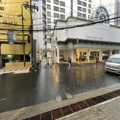

1501


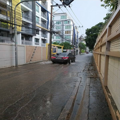

1502


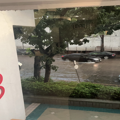

1503


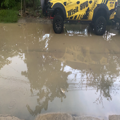

1504


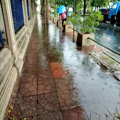

1505


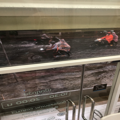

1506


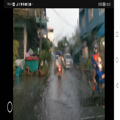

1507


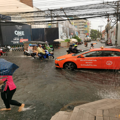

1508


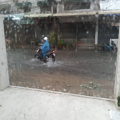

1509


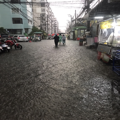

1510


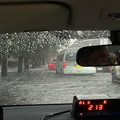

1511


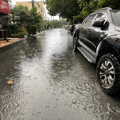

1512


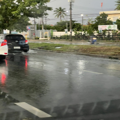

1513


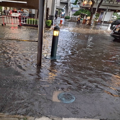

1514


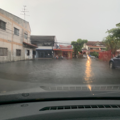

1515


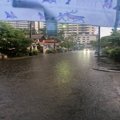

1516


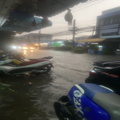

1517


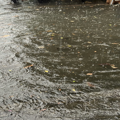

1518


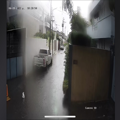

1519


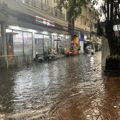

1520


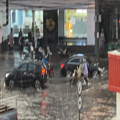

1521


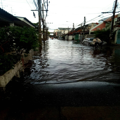

1522


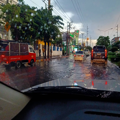

1523


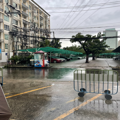

1524


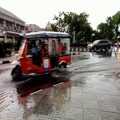

1525


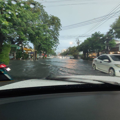

1526


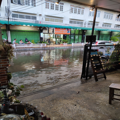

1527


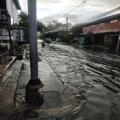

1528


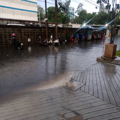

1529


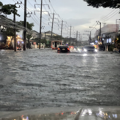

1530


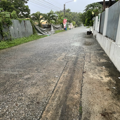

1531


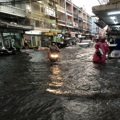

1532


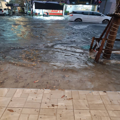

1533


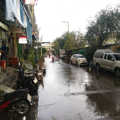

1534


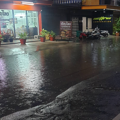

1535


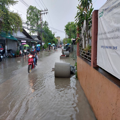

1536


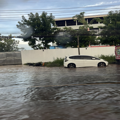

1537


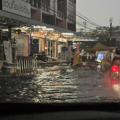

1538


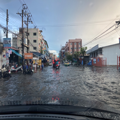

1539


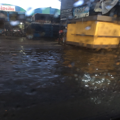

1540


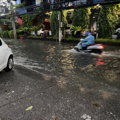

1541


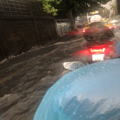

1542


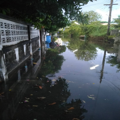

1543


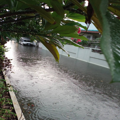

1544


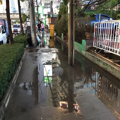

1545


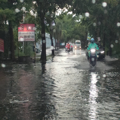

1546


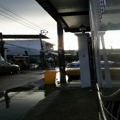

1547


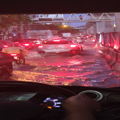

1548


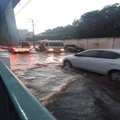

1549


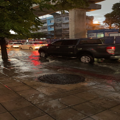

1550


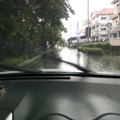

1551


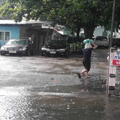

1552


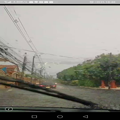

1553


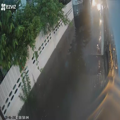

1554


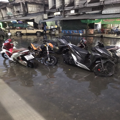

1555


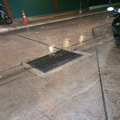

1556


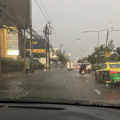

1557


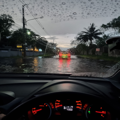

1558


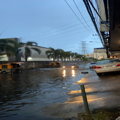

1559


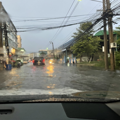

1560


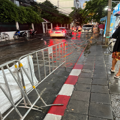

1561


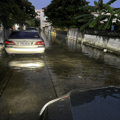

1562


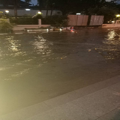

1563


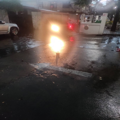

1564


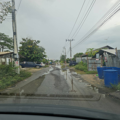

1565


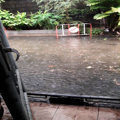

1566


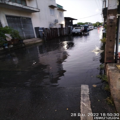

1567


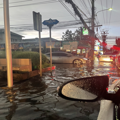

1568


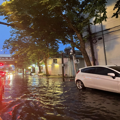

1569


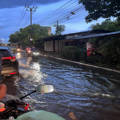

1570


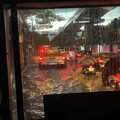

1571


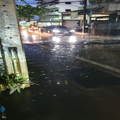

1572


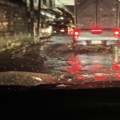

1573


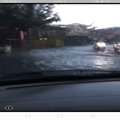

1574


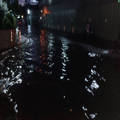

1575


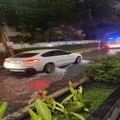

1576


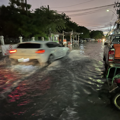

1577


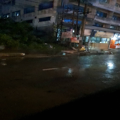

1578


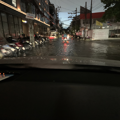

1579


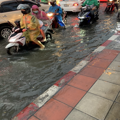

1580


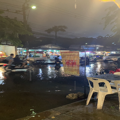

1581


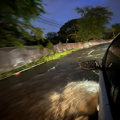

1582


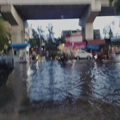

1583


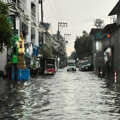

1584


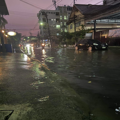

1585


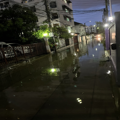

1586


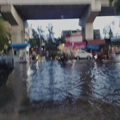

1587


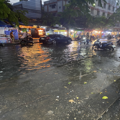

1588


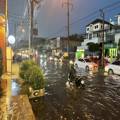

1589


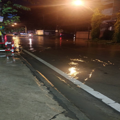

1590


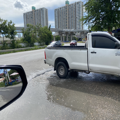

1591


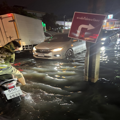

1592


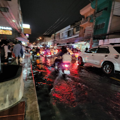

1593


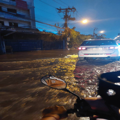

1594


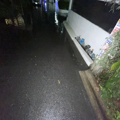

1595


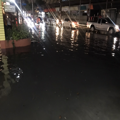

1596


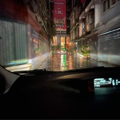

1597


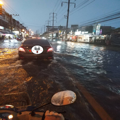

1598


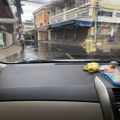

1599


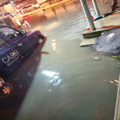

In [6]:
count=1500
for i in dff["photo"][1500:1600]:
    print(count)
    response=requests.get(i)
    img=Image.open(BytesIO(response.content),mode='r')
    display(img.resize((120,120)))
    count+=1

In [19]:
dff=pd.read_csv("/Users/kunkerdthaisong/cils/select_flooded_road.csv")
dff=dff[dff["level"].isna()==False]
dff=dff[dff["level"]!=-1]
dff[dff["level"]==0]=1
dff[dff["level"]==3]=0
dff["level"].value_counts()

level
2.0    323
1.0    178
0.0      1
Name: count, dtype: int64

In [21]:
dff.to_csv("selected_flooded_v2.csv")

In [24]:
dff=pd.read_csv("/Users/kunkerdthaisong/cils/flooded_road/selected_flooded_v2.csv")
dff=dff.drop(["type","index","organization","comment","address","last_activity"],axis=1)
dff

Unnamed: 0.1  Unnamed: 0    ticket_id  \
0               6           6  2021-4HX64Z   
1               9           9  2022-3DGMEG   
2              23          23  2022-AN82TZ   
3              24          24  2022-QV4PFD   
4              29          29  2022-AV6TV6   
..            ...         ...          ...   
497          1558        1558  2022-NLMAFK   
498          1571        1571  2022-8GBDZB   
499          1579        1579  2022-DQHTRM   
500          1587        1587  2022-CL7L2M   
501          1589        1589  2022-3LATLW   

                                                 photo  \
0    https://storage.googleapis.com/traffy_public_b...   
1    https://storage.googleapis.com/traffy_public_b...   
2    https://storage.googleapis.com/traffy_public_b...   
3    https://storage.googleapis.com/traffy_public_b...   
4    https://storage.googleapis.com/traffy_public_b...   
..                                                 ...   
497  https://storage.googleapis.com/traffy_public_b...   
498  https://storage.googleapis.com/traffy_public_b...   
499  https://storage.googleapis.com/traffy_public_b...   
500  https://storage.googleapis.com/traffy_public_b...   
501  https://storage.googleapis.com/traffy_public_b...   

                                           photo_after              coords  \
0                                                  NaN  100.44991,13.61629   
1                                                  NaN  100.42054,13.76444   
2    https://storage.googleapis.com/traffy_public_b...  100.63242,13.90728   
3    https://storage.googleapis.com/traffy_public_b...  100.60678,13.82419   
4                                                  NaN  100.43866,13.67215   
..                                                 ...                 ...   
497                                                NaN  100.63710,13.73443   
498                                                NaN  100.61873,13.79086   
499  https://storage.googleapis.com/traffy_public_b...  100.57617,13.77860   
500                                                NaN  100.63706,13.78140   
501  https://storage.googleapis.com/traffy_public_b...  100.43268,13.66691   

          subdistrict     district       province  \
0             ท่าข้าม  บางขุนเทียน  กรุงเทพมหานคร   
1            บางระมาด     ตลิ่งชัน  กรุงเทพมหานคร   
2             คลองถนน       สายไหม  กรุงเทพมหานคร   
3            ลาดพร้าว     ลาดพร้าว  กรุงเทพมหานคร   
4               แสมดำ  บางขุนเทียน  กรุงเทพมหานคร   
..                ...          ...            ...   
497           สวนหลวง      สวนหลวง  กรุงเทพมหานคร   
498  คลองเจ้าคุณสิงห์   วังทองหลาง  กรุงเทพมหานคร   
499          ห้วยขวาง     ห้วยขวาง  กรุงเทพมหานคร   
500          คลองจั่น      บางกะปิ  กรุงเทพมหานคร   
501             แสมดำ  บางขุนเทียน  กรุงเทพมหานคร   

                         timestamp           state  star  count_reopen  level  
0    2021-12-12 11:19:22.825762+00  กำลังดำเนินการ   NaN             0    2.0  
1    2022-03-03 09:05:34.238272+00     รอรับเรื่อง   NaN             0    2.0  
2     2022-05-29 12:02:36.39024+00       เสร็จสิ้น   5.0             0    1.0  
3    2022-05-29 12:04:06.983234+00       เสร็จสิ้น   5.0             0    2.0  
4    2022-05-29 17:23:46.218348+00       เสร็จสิ้น   1.0             0    2.0  
..                             ...             ...   ...           ...    ...  
497  2022-06-28 12:01:30.521466+00       เสร็จสิ้น   5.0             0    2.0  
498  2022-06-28 12:06:22.259521+00       เสร็จสิ้น   NaN             0    2.0  
499  2022-06-28 12:11:56.830417+00       เสร็จสิ้น   4.0             0    2.0  
500  2022-06-28 12:15:57.155016+00       เสร็จสิ้น   NaN             0    2.0  
501   2022-06-28 12:18:53.06404+00       เสร็จสิ้น   5.0             0    2.0  

[502 rows x 14 columns]

In [27]:
for i,row in dff[["photo","ticket_id"]].iterrows():
    count=0
    try:
        response=requests.get(row["photo"])
        img=Image.open(BytesIO(response.content),mode='r')
        img.save(f"/Users/kunkerdthaisong/cils/selected_flood/{count}.jpg")
        count+=1
    except:
        pass
#for i,row in dff[["photo","ticket_id"]][60:67].iterrows():
#    response=requests.get(row["photo"])
#    img=Image.open(BytesIO(response.content),mode='r')
#    id=row["ticket_id"]
#    img.save(f"/Users/kunkerdthaisong/cils/train_test_flood_img/test/{id}_c2.jpg")



In [54]:
len(glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/train/1/*")),len(glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/train/2/*")),len(glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/train/0/*"))

(60, 60, 60)

In [65]:
path_l=glob.glob("/Users/kunkerdthaisong/cils/train_test_flood_img/test/*.jpg")
class_c=[int(i.split("_c")[1].split(".")[0]) for i in path_l]
class_c

[2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0]

In [67]:
dfx=pd.DataFrame({"path":path_l,"class":class_c})
dfx

path  class
0   /Users/kunkerdthaisong/cils/train_test_flood_i...      2
1   /Users/kunkerdthaisong/cils/train_test_flood_i...      1
2   /Users/kunkerdthaisong/cils/train_test_flood_i...      1
3   /Users/kunkerdthaisong/cils/train_test_flood_i...      1
4   /Users/kunkerdthaisong/cils/train_test_flood_i...      2
5   /Users/kunkerdthaisong/cils/train_test_flood_i...      1
6   /Users/kunkerdthaisong/cils/train_test_flood_i...      2
7   /Users/kunkerdthaisong/cils/train_test_flood_i...      0
8   /Users/kunkerdthaisong/cils/train_test_flood_i...      2
9   /Users/kunkerdthaisong/cils/train_test_flood_i...      1
10  /Users/kunkerdthaisong/cils/train_test_flood_i...      0
11  /Users/kunkerdthaisong/cils/train_test_flood_i...      2
12  /Users/kunkerdthaisong/cils/train_test_flood_i...      0
13  /Users/kunkerdthaisong/cils/train_test_flood_i...      2
14  /Users/kunkerdthaisong/cils/train_test_flood_i...      2
15  /Users/kunkerdthaisong/cils/train_test_flood_i...      0
16  /Users/kunkerdthaisong/cils/train_test_flood_i...      1
17  /Users/kunkerdthaisong/cils/train_test_flood_i...      0